# Carga de librerías

In [1]:
import numpy as np
import os


import random
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import tensorflow as tf

# Loads an image into PIL format.
from tensorflow.keras.preprocessing import image

#Preprocesa un tensor o matriz Numpy codificando un lote de imágenes.
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Para codificaciones one-hot
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Para cargar el modelo MobileNetV2
from tensorflow.keras.applications import MobileNetV2

# Carga de los datos

In [2]:
root = 'dataset'

for root, dirs, files in os.walk(root):
    if len(dirs) > 0:
        categories = [os.path.join(root, x) for x in dirs if x not in []]

In [3]:
categories

['dataset\\training_set\\cats', 'dataset\\training_set\\dogs']

In [4]:
def get_image(path):
    
    # Se carga la imagen y se hace un resize, ya que es el tamaño que requiere MobileNetV2 (224x224 RGB)
    img = image.load_img(path, target_size=(224, 224))
    
    # Se transforma a un array
    x = image.img_to_array(img)
    
    # np.expand_dims expande la forma de una matriz
    # Inserta un nuevo eje que aparecerá en la posición
    # del parámetro axis en la forma de matriz expandida.
    
    # "axis" indica la posición en los ejes expandidos 
    # donde se coloca el nuevo eje (o ejes).
    
    # Tamaño inicial de la imagen: (224, 224, 3)
    # Tamaño expandido de la imagen: (1, 224, 224, 3)    
    x = np.expand_dims(x, axis=0)
    
    #Preprocesa un tensor o matriz Numpy codificando un lote de imágenes.
    # Devuelve un numpy.array o un tf.Tensor preprocesado con tipo float32.
    x = preprocess_input(x)
    
    return img, x

Ahora cargaremos los datos del directorio:

In [5]:
# Inicializamos una lista para almacenar diccionarios imagen-categoría
data = []

# Para cada índice, categoría:
for c, category in enumerate(categories):
    
    # Inicializamos lista para almacenar las imágenes de la categoría
    images = []
    
    # Para cada root, dir intermedio (vacío), filename en la categoría
    for dp, _, filenames in os.walk(category):
        
        # Para cada nombre de imagen 
        for f in filenames:
            
            # print(os.path.splitext(f)) # Devuelve ('image_0001', '.jpg')
            # Si la extensión del archivo está bien:
            if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']:
                images.append(os.path.join(dp, f))
                
    for img_path in images:
    
        # Utilizamos ahora la función de carga definida más arriba
        img, x = get_image(img_path)

        # Creamos un diccionario para generar cada X y su target
        data.append({'x':np.array(x[0]), 'y':c})          

In [6]:
num_classes = len(categories)
num_classes

2

Mezclamos los datos para darles aleatoriedad:

In [7]:
random.shuffle(data)

Y se definen las particiones de entrenamiento (train) y validación (val):

In [8]:
# Particiones de train y validation
train_split, val_split = 0.85, 0.15 # Val split: 0.15

In [9]:
# Los datos de entrenamiento se tomarán desde el principio hasta idx_val
idx_val = int(train_split * len(data))
idx_val

6800

In [10]:
len(data)

8000

In [11]:
# Los datos de entrenamiento se toman desde el principio hasta idx_val
train = data[:idx_val]

In [12]:
len(train)

6800

In [13]:
# Los datos de validación se toman desde el idx_val hasta idx_test
val = data[idx_val:]

In [14]:
len(val)

1200

Separamos ahora los datos de las etiquetas:

In [15]:
X_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]

In [16]:
X_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
print(y_val)

[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 

# Preprocesamiento de los datos

Preprocesaremos los datos para asegurarnos de que sean float32 y estén normalizados entre -1 y 1.

In [17]:
# Normalización
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [18]:
X_train = rescale(X_train)
X_val = rescale(X_val)

In [19]:
# Conversión de etiquetas en vectores one-hot
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [20]:
y_val

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

Un resumen de los valores obtenidos hasta ahora:

In [21]:
print('*'*100)
print('')
print(f"Se han cargado {len(data)} imágenes de {num_classes} categorías")
print(f"Entrenamiento {len(X_train)} / Validación {len(X_val)}")
print('-'*100)
print(f"Dimensiones de las variables del subconjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones de las etiquetas de entrenamiento: {y_train.shape}")
print('-'*100)
print(f"Dimensiones de las variables del subconjunto de validación: {X_val.shape}")
print(f"Dimensiones de las etiquetas de validación: {y_val.shape}")
print('')
print('*'*100)

****************************************************************************************************

Se han cargado 8000 imágenes de 2 categorías
Entrenamiento 6800 / Validación 1200
----------------------------------------------------------------------------------------------------
Dimensiones de las variables del subconjunto de entrenamiento: (6800, 224, 224, 3)
Dimensiones de las etiquetas de entrenamiento: (6800, 2)
----------------------------------------------------------------------------------------------------
Dimensiones de las variables del subconjunto de validación: (1200, 224, 224, 3)
Dimensiones de las etiquetas de validación: (1200, 2)

****************************************************************************************************


A continuación vamos a representar una muestra aleatoria de imágenes para comprobar con qué estamos trabajando:

In [22]:
# Tomamos una muestra aleatoria de imágenes, para lo cual seleccionamos su índice
idx = [int(len(images) * random.random()) for i in range(8)]
idx

[1844, 190, 2565, 3007, 2315, 2131, 3559, 1795]

In [23]:
# Las cargamos con keras en formato PIL
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
imgs

[<PIL.Image.Image image mode=RGB size=224x224 at 0x218ADA9D198>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218ADA9D320>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218ADA9D1D0>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218ADA9D160>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218BFB13F60>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218BFB13E10>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218BFB13F28>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x218BFB13C88>]

In [24]:
# Convertimos la lista anterior en una lista de arrays de numpy
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)

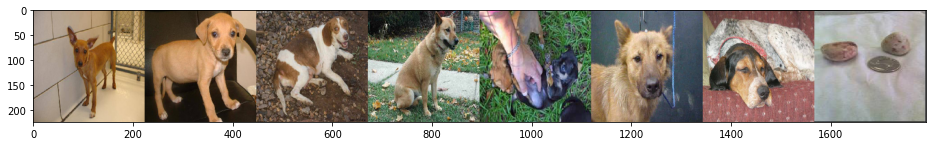

In [25]:
plt.figure(figsize=(16,4))
plt.imshow(concat_image)
plt.show()

# Transfer Learning

## Entrenando el Modelo MobileNet V2

Instanciamos el modelo MobileNet V2:

In [26]:
MobNet = MobileNetV2(weights='imagenet', include_top=True)
MobNet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [27]:
# Hacemos referencia a la capa de entrada de MobilNet
inp = MobNet.input

# Creamos una nueva capa softmax con tantas neuronas como num_classes
new_classification_layer = Dense(num_classes, activation='softmax')

# Conectamos nuestra nueva capa a la estructura copiada de MobileNet V2 
# (desde la segunda hasta la última capa de MobileNet V2), 
# y hacemos una referencia a ella
out = new_classification_layer(MobNet.layers[-2].output)

# Creamos una nueva red entre inp y out
model_new = Model(inp, out)

In [28]:
# Hacemos todas las capas "no entrenables" congelando sus pesos (excepto la última)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# Nos aseguramos de que la última capa sea entrenable (no esté congelada)
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

Seguidamente, se lleva a cabo el entrenamiento del nuevo modelo con todas las capas y pesos congelados exceptuando la nueva última capa:

In [29]:
history_1 = model_new.fit(X_train, y_train, 
                         batch_size=32, 
                         epochs=10, 
                         validation_data=(X_val, y_val))

Epoch 1/10
213/213 [==============================] - 126s 580ms/step - loss: 0.1740 - accuracy: 0.9279 - val_loss: 0.1428 - val_accuracy: 0.9417
Epoch 2/10
213/213 [==============================] - 121s 567ms/step - loss: 0.1215 - accuracy: 0.9496 - val_loss: 0.1837 - val_accuracy: 0.9317
Epoch 3/10
213/213 [==============================] - 119s 559ms/step - loss: 0.1024 - accuracy: 0.9587 - val_loss: 0.1308 - val_accuracy: 0.9408
Epoch 4/10
213/213 [==============================] - 120s 565ms/step - loss: 0.0921 - accuracy: 0.9631 - val_loss: 0.1305 - val_accuracy: 0.9475
Epoch 5/10
213/213 [==============================] - 120s 563ms/step - loss: 0.0851 - accuracy: 0.9650 - val_loss: 0.1403 - val_accuracy: 0.9442
Epoch 6/10
213/213 [==============================] - 120s 563ms/step - loss: 0.0830 - accuracy: 0.9671 - val_loss: 0.1548 - val_accuracy: 0.9467
Epoch 7/10
213/213 [==============================] - 120s 565ms/step - loss: 0.0743 - accuracy: 0.9699 - val_loss: 0.1337 -

A continuación, se representan los valores de la función de coste y precisión para los datos de validación:

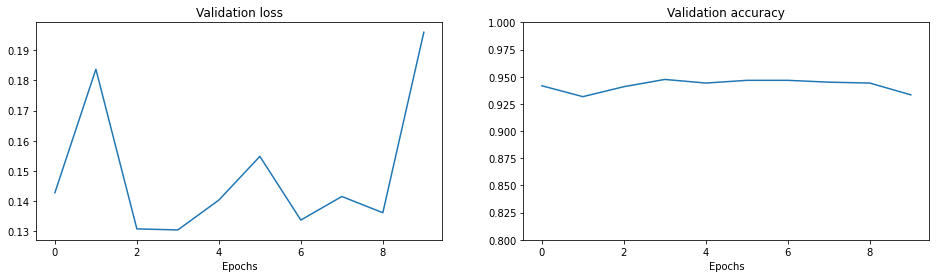

In [30]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history_1.history["val_loss"])
ax.set_title("Validation loss")
ax.set_xlabel("Epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history_1.history["val_accuracy"])
ax2.set_title("Validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylim(0.8, 1)

plt.show()

Según las imágenes mostradas se observa que la pérdida de validación comienza a aumentar justo a partir de la octava epoch; además, se comprueba que la precisión de la validación máxima se obtiene en esa misma época, alcanzando un valor del 95%.

Esto sugiere que nuestro modelo comienza a sobreajustarse en ese punto y que el mejor rendimiento se alcanza deteniendo el entrenamiento antes. El óptimo se conseguiría, por tanto, realizándose 8 epochs.

En general, aplicando Transfer-Learning se obtiene una precisión del 98% para los datos de entrenamiento y de un 94% para los de validación.

## Predicciones

Cargamos los datos de test:

In [31]:
root = 'test_set'

for root, dirs, files in os.walk(root):
    if len(dirs) > 0:
        categories_test = [os.path.join(root, x) for x in dirs if x not in []]

In [32]:
categories_test

['test_set\\cats', 'test_set\\dogs']

In [33]:
data_test = []

for c, category in enumerate(categories_test):
    
    images_test = []
    
    for dp, _, filenames in os.walk(category):
        
        for f in filenames:
            
            if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']:
                images_test.append(os.path.join(dp, f))
                
    for img_path_test in images_test:
    
        img, x = get_image(img_path_test)
        data_test.append({'x':np.array(x[0]), 'y':c})
                

Mezclamos los datos para darles aleatoriedad:

In [34]:
random.shuffle(data_test)

Y separamos de nuevo los datos de las etiquetas, al igual que hicimos con los datos de entrenamiento:

In [35]:
X_test, y_test = np.array([t["x"] for t in data_test]), [t["y"] for t in data_test]
print(y_test)

[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 

Comprobamos que se han cargado correctamente las etiquetas de las 2000 imágenes del conjunto de test:

In [36]:
len(y_test)

2000

Normalizamos los datos y realizamos la conversión one-hot para las etiquetas:

In [37]:
X_test = rescale(X_test)
y_test = to_categorical(y_test, num_classes)
print(y_test.shape)

(2000, 2)


A modo de resumen:

In [38]:
print('*'*100)
print('')
print(f"Se han cargado {len(data_test)} imágenes de {num_classes} categorías")
print('-'*100)
print(f"Dimensiones de las variables del subconjunto de test: {X_test.shape}")
print(f"Dimensiones de las etiquetas de test: {y_test.shape}")
print('')
print('*'*100)

****************************************************************************************************

Se han cargado 2000 imágenes de 2 categorías
----------------------------------------------------------------------------------------------------
Dimensiones de las variables del subconjunto de test: (2000, 224, 224, 3)
Dimensiones de las etiquetas de test: (2000, 2)

****************************************************************************************************


Por último, realizaremos una valoración del modelo en base a sus predicciones:

In [39]:
loss, accuracy = model_new.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.1818431317806244
Test accuracy: 0.9365000128746033


Obteniéndose unos valores similares a los conseguidos durante el entrenamiento.

Si se quisiera predecir una imagen:

In [40]:
img, x = get_image('test_set/cats/cat.4014.jpg')
pred = model_new.predict([x])

In [41]:
pred.max()

0.9389006

In [42]:
pred.argmax()

0

In [43]:
categories_test[0]

'test_set\\cats'

Para el caso particular de la imagen cat.4014.jpg, el modelo predice con una probabilidad de acierto del 94% que la figura se corresponde con la categoría de gato.